# Магические методы

Магические методы в Python представляют специальные методы с особым именем, начинающимся и заканчивающимся на два подчеркивания `(__)` - например, `__init__`, `__add__`, `__eq__`, и т.д. Эти методы позволяют определить поведение объектов при выполнении определенных операций, таких как математические операции, сравнения, преобразования и другие.


### Методы математических операций

Методы математических операций определяют поведение объекта при выполнении арифметических операций:
* сложение `(__add__)`
* вычитание `(__sub__)`
* умножение `(__mul__)`
* деление `(__truediv__)` и другие.

In [1]:
a = 3
print(a.__add__(2)) #эквивалентно a+=2

5


In [2]:
a = 3
print(a.__mul__(2)) # a*=2

6


In [3]:
a = 3.0
print(a.__truediv__(1)) #a/=1

3.0


In [4]:
a = 3
print(a.__eq__(2)) #a==2

False


In [5]:
a = 3
print(a.__eq__(3)) #a==3

True


In [7]:
a = 3
print(a.__radd__(2))

5


In [8]:
a = 5
a.__sub__(2)

3

In [9]:
a = 5
a.__rsub__(2)

-3

In [10]:
a='s'
b='dfg'
a.__add__(b)

'sdfg'

In [12]:
class Money:
    def __init__(self, amount, currency):
        self.amount = amount
        self.currency = currency
        
    def __add__(self, other):
        if self.currency == other.currency:
            return Money(self.amount + other.amount, self.currency)
    
    def __str__(self):
        return f"{self.amount} {self.currency}"
    
    
m1 = Money(100, "eur")
m2 = Money(230, "eur")
print(m1 + m2)


330 eur


In [13]:
m1 = Money(100, "rub")
m2 = Money(230, "eur")
print(m1 + m2)

None


## Декоратор @functools.total_ordering

Декоратор @functools.total_ordering позволяет автоматически генерировать недостающие методы сравнения `(__lt__, __le__, __gt__, __ge__)` на основе метода `__eq__` и одного из методов `__lt__` или `__gt__`. Это упрощает реализацию полного набора операций сравнения для класса.


In [16]:
#from functools import total_ordering

#@total_ordering
class MyClass:
    def __init__(self, value):
        self.value = value

    def __eq__(self, other):
        return self.value == other.value

    def __lt__(self, other):
        return self.value < other.value

    def __le__(self, other):
        return self.value <= other.value

    def __gt__(self, other):
        return self.value > other.value

    def __ge__(self, other):
        return self.value >= other.value

# Создаем объекты
obj1 = MyClass(10)
obj2 = MyClass(20)

# Примеры сравнения
print(obj1 == obj2)  # False
print(obj1 <= obj2)   # True
print(obj1 > obj2) # False
print(obj1 < obj2)
print(obj1 >= obj2)

False
True
False
True
False


In [17]:
from functools import total_ordering

@total_ordering
class MyClass:
    def __init__(self, value):
        self.value = value

    def __eq__(self, other):
        return self.value == other.value

    def __lt__(self, other):
        return self.value < other.value

# Создаем объекты
obj1 = MyClass(10)
obj2 = MyClass(20)

# Примеры сравнения
print(obj1 == obj2)  # False
print(obj1 <= obj2)   # True
print(obj1 > obj2) # False
print(obj1 < obj2)
print(obj1 >= obj2)

False
True
False
True
False


В данном примере мы создали класс MyClass, который имеет атрибут value. С помощью декоратора @total_ordering мы автоматически генерируем методы сравнения `(__eq__, __lt__, __le__, __gt__, __ge__)` на основе уже определенных `(__eq__ и __lt__)`. Теперь объекты этого класса можно сравнивать с помощью операторов сравнения, таких как ==, <, >, и так далее2. Это упрощает реализацию “богатых” сравнений для пользовательских классов.

#### Метод `__len__`:
Этот метод вызывается функцией len(...). Он возвращает количество элементов в последовательности (например, в списке, кортеже или строке).

In [18]:
class MyList:
    def __init__(self, items):
        self.items = items

    def __len__(self):
        return len(self.items)

my_list = MyList([1, 2, 3, 4, 5, 6, 1])
print(len(my_list))  # Вывод: 5


7


In [19]:
class MyList:
    def __init__(self, items):
        self.items = items

my_list = MyList([1, 2, 3, 4, 5, 6, 1])
print(len(my_list))  # Вывод: 5

TypeError: object of type 'MyList' has no len()

#### Метод `__hash__`:
Этот метод вызывается функцией hash(...). Он используется для определения контрольной суммы объекта, чтобы доказать его уникальность.

In [ ]:
dir(MyList)

In [20]:
hash(' ')

5388394197434621642

In [21]:
class MyObject:
    def __init__(self, value):
        self.value = value

    def __hash__(self):
        return hash(self.value)

obj1 = MyObject("hello")
obj2 = MyObject("world")

print(hash(obj1))  # Вывод: уникальное значение хэша для "hello"
print(hash(obj2))  # Вывод: уникальное значение хэша для "world"


-5314623517408718305
-545958769956732533


#### Метод `__bool__`:
Этот метод вызывается функцией bool(...). Он возвращает True, если объект истинен (ненулевой), и False, если объект ложен (нулевой).

In [22]:
class MyBool:
    def __init__(self, value):
        self.value = value

    def __bool__(self):
        return bool(self.value)

true_obj = MyBool(True)
false_obj = MyBool(False)

print(bool(true_obj))   # Вывод: True
print(bool(false_obj))  # Вывод: False


True
False


In [23]:
true_obj = MyBool('dfghn')
false_obj = MyBool('')

print(bool(true_obj))  
print(bool(false_obj))

True
False


#### Метод `__getitem__`
Методы __getitem__ и __setitem__ определяют поведение объекта при доступе к элементам через индексацию, подобно словарю. __getitem__ позволяет получить значение по ключу, а __setitem__ - присвоить значение по ключу.


In [24]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

In [25]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])
print(s1.marks[2])

3


Но что если мы хотим делать то же самое, но используя только ссылку на объект s1:

In [26]:
print(s1[2])

TypeError: 'Student' object is not subscriptable

In [27]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)
    def __getitem__(self, item):
        return self.marks[item]

In [28]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])

In [29]:
print(s1[2])

3


In [30]:
print(s1[20])

IndexError: list index out of range

In [31]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)
    def __getitem__(self, item):
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

In [32]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])

In [33]:
print(s1[20])

IndexError: Неверный индекс

In [34]:
print(s1[2])

3


In [35]:
print(s1['abc'])

TypeError: '<=' not supported between instances of 'int' and 'str'

In [36]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)

    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

In [37]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])

In [38]:
print(s1['abc'])

TypeError: Индекс должен быть целым числом

In [39]:
print(s1[2])

3


Теперь давайте предположим, что хотели бы иметь возможность менять оценки студентов, используя синтаксис:

In [40]:
s1[2] = 4
print(s1[2])

TypeError: 'Student' object does not support item assignment

In [41]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)
        
    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

    def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        self.marks[key] = value

In [42]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])

In [43]:
s1[3] = 4

In [44]:
print(s1[3])

4


Однако, если мы сейчас укажем несуществующий индекс:

In [45]:
s1[6] = 4

IndexError: list assignment index out of range

In [47]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)
        
    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

    def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        if key >= len(self.marks):
            off = key + 1 - len(self.marks)
            self.marks.extend([None]*off)
 
        self.marks[key] = value

In [48]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])

In [49]:
s1[10] = 4
print(s1.marks)

[5, 5, 3, 2, 5, None, None, None, None, None, 4]


#### метод `__delitem__`
Наконец, последний третий магический метод `__delitem__` вызывается при удалении элемента из списка. Если сейчас записать команду:

In [50]:
del s1[2]

AttributeError: __delitem__

In [51]:
class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = list(marks)
        
    def __getitem__(self, item):
        if not isinstance(item, int):
            raise TypeError("Индекс должен быть целым числом")
        if 0 <= item < len(self.marks):
            return self.marks[item]
        else:
            raise IndexError("Неверный индекс")

    def __setitem__(self, key, value):
        if not isinstance(key, int) or key < 0:
            raise TypeError("Индекс должен быть целым неотрицательным числом")
 
        if key >= len(self.marks):
            off = key + 1 - len(self.marks)
            self.marks.extend([None]*off)
 
        self.marks[key] = value

    def __delitem__(self, key):
        if not isinstance(key, int):
            raise TypeError("Индекс должен быть целым числом")
 
        del self.marks[key]

In [52]:
s1 = Student('Сергей', [5, 5, 3, 2, 5])

In [53]:
del s1[2]

In [54]:
print(s1.marks)

[5, 5, 2, 5]


#### Магический метод `__call__`

Метод `__call__` позволяет вызывать экземпляр класса как функцию. Это полезно, когда класс представляет собой вызываемый объект и нужно определить логику вызова.

Классы с методом `__call__` могут быть вызваны с использованием круглых скобок, как функции:


In [55]:
class Counter:
    def __init__(self):
        self.__counter = 0

In [56]:
c = Counter()

Обратите внимание на круглые скобки после имени класса. В общем случае – это оператор вызова, например, так можно вызывать функции. Но, как видите, так можно вызывать и классы. В действительности, когда происходит вызов класса, то автоматически запускается магический метод `__call__` и в данном случае он создает новый экземпляр этого класса:

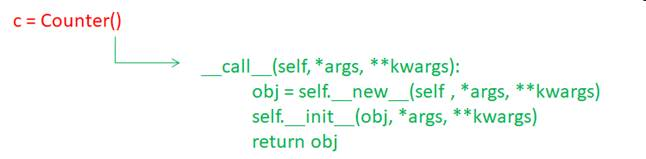

Это очень упрощенная схема реализации метода `__call__`, в действительности, она несколько сложнее, но принцип тот же: сначала вызывается магический метод `__new__` для создания самого объекта в памяти устройства, а затем, метод `__init__` - для его инициализации. То есть, класс можно вызывать подобно функции благодаря встроенной для него реализации магического метода `__call__`. А вот экземпляры классов так вызывать уже нельзя. Если записать команду:

In [57]:
c()

TypeError: 'Counter' object is not callable

In [58]:
class Counter:
    def __init__(self):
        self.__counter = 0
 
    def __call__(self, *args, **kwargs):
        print("__call__")
        self.__counter += 1
        return self.__counter

In [59]:
c = Counter()
c()
c()
res = c()
print(res)

__call__
__call__
__call__
3


#### Магические методы `__iter__` и `__next__`

Метод `__iter__` определяет, как объект должен быть перебираемым, и возвращает итератор. Метод `__next__` определяет логику получения следующего элемента из итератора.


In [60]:
list(range(5))

[0, 1, 2, 3, 4]

In [61]:
a = iter(range(5))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))

0
1
2
3
4


StopIteration: 

In [63]:
list(range(2,15,2))

[2, 4, 6, 8, 10, 12, 14]

In [ ]:
class FRange:
    def __init__(self, start=0.0, stop=0.0, step=1.0):
        self.start = start
        self.stop = stop
        self.step = step
        self.value = self.start - self.step

Здесь в инициализатор мы передаем начальное значение прогрессии, конечное и шаг изменения. Также формируем свойство value, которое будет представлять собой текущее значение для считывания.

Для перебора элементов добавим в этот класс метод, который будет соответствовать магическому методу __next__:

In [64]:
class FRange:
    def __init__(self, start=0.0, stop=0.0, step=1.0):
        self.start = start
        self.stop = stop
        self.step = step
        self.value = self.start - self.step

    def __next__(self):
        if self.value + self.step < self.stop:
            self.value += self.step
            return self.value
        else:
            raise StopIteration

In [65]:
fr = FRange(0, 2, 0.5) #0,0.5,1,1.5

In [66]:
print(fr.__next__()) #next(fr)
print(fr.__next__())
print(fr.__next__())
print(fr.__next__())

0.0
0.5
1.0
1.5


In [67]:
print(fr.__next__())

StopIteration: 

В действительности, благодаря определению магического метода __next__ в классе FRange, мы можем применять функцию next() для перебора значений его объектов:

In [68]:
fr = FRange(0, 2, 0.5)
print(next(fr))
print(next(fr))
print(next(fr))
print(next(fr))

0.0
0.5
1.0
1.5


Здесь функция next() вызывает метод __next__ и возвращенное им значение, возвращается функцией next(). При этом, в качестве аргумента мы ей передаем экземпляр самого класса. То есть, объект класса выступает в роли итератора. В нашем случае так и задумывалось. Однако, перебрать объект fr с помощью цикла for не получится:

In [69]:
fr = FRange(0, 2, 0.5)
for x in iter(fr):
    print(x)

TypeError: 'FRange' object is not iterable

Появится ошибка, что объект не итерируемый. Почему? Ведь мы прописали поведение функции next()? Этого не достаточно. Необходимо еще, чтобы объект возвращал итератор при вызове функции iter:

In [ ]:
it = iter(fr)

Для этого в классе нужно прописать еще один магический метод __iter__. В нашем примере он будет выглядеть, так:

In [70]:
class FRange:
    def __init__(self, start=0.0, stop=0.0, step=1.0):
        self.start = start
        self.stop = stop
        self.step = step
        self.value = self.start - self.step

    def __next__(self):
        if self.value + self.step < self.stop:
            self.value += self.step
            return self.value
        else:
            raise StopIteration

    def __iter__(self):
        self.value = self.start - self.step
        return self

In [71]:
fr = FRange(0, 2, 0.5)
it = iter(fr)
print(next(it))
print(next(it))
print(next(it))
print(next(it))

0.0
0.5
1.0
1.5


In [72]:
fr = FRange(0, 2, 0.5)
for x in iter(fr):
    print(x)

0.0
0.5
1.0
1.5


#### Метод `__dict__`

Метод __dict__ возвращает словарь, содержащий атрибуты объекта.

In [73]:
class MyClass:
    def __init__(self):
        self.x = 1
        self.y = 2
        self.z = 3

obj =MyClass()
print(obj.__dict__)  # {'x': 1, 'y': 2}


{'x': 1, 'y': 2, 'z': 3}


## Практическое задание

Дополнить класс Person операцией сложения. При сложении двух объектов этого класса операция должна возвращать новый объект класса Person, у которого рост - четверть от среднего арифметического роста родителей, вес - двадцатая часть от среднего арифметического веса родителей, год рождения - текущий. 
Дополнительно придумать и определить методы _len_, _bool_.


In [74]:
class Person:
    
    def __init__(self, name, height, weight, birth_year):
        self.name = name
        self.height = height
        self.weight = weight
        self.birth_year = birth_year

    def __add__(self, other):
        # Рассчитываем средний рост и вес родителей
        avg_height = (self.height + other.height) / 2
        avg_weight = (self.weight + other.weight) / 2

        # Создаем новый объект Person с указанными свойствами
        child = Person("Child", avg_height / 4, avg_weight / 20, self._current_year())
        return child

    def __len__(self):
        # Возвращаем длину имени (количество символов)
        return len(self.name)

    def __bool__(self):
        # Возвращаем True, если имя не пустое, иначе False
        return bool(self.name)

    def _current_year(self):
        # Возвращает текущий год (просто для примера)
        return 2025

# Пример использования
parent1 = Person("Alice", 170, 60, 1980)
parent2 = Person("Bob", 180, 70, 1985)

child = parent1 + parent2
print(f"Child's name: {child.name}")
print(f"Child's height: {child.height:.2f} cm")
print(f"Child's weight: {child.weight:.2f} kg")
print(f"Child's birth year: {child.birth_year}")
print(f"Length of child's name: {len(child)}")
print(f"Is child's name non-empty? {bool(child)}")


Child's name: Child
Child's height: 43.75 cm
Child's weight: 3.25 kg
Child's birth year: 2025
Length of child's name: 5
Is child's name non-empty? True


### ДЗ

Реализовать класс Counter, который представляет счетчик. Класс должен поддерживать следующие операции:
Увеличение значения счетчика на заданное число (оператор +=)
Уменьшение значения счетчика на заданное число (оператор -=)
Преобразование счетчика в строку (метод `__str__`)
Получение текущего значения счетчика (метод `__int__`)


Реализовать класс Email, представляющий электронное письмо. Класс должен поддерживать следующие операции:
Сравнение писем по дате (операторы <, >, <=, >=, ==, !=)
Преобразование письма в строку (метод __str__)
Получение длины текста письма (метод __len__)
Получение хеш-значения письма (метод __hash__)
Проверка наличия текста в письме (метод __bool__)


### Полезные материалы
1. Гайд по магическим методам в Python https://tproger.ru/articles/gajd-po-magicheskim-metodam-v-python/
2. Руководство по магическим методам в Питоне https://habr.com/ru/articles/186608/ 

### Вопросы для закрепления
1. Какие вы запомнили магические методы? За что они отвечают?
2. Когда могут понадобиться методы `__radd__`, `__rmul__` и т.д.?
3. Сколько нужно задать методов сравнения элементов, если вы пишете свой класс?
